In [313]:
import pandas as pd
import ast
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots


df_entreprises = pd.read_csv("data/entreprises_producteurs.csv")
df_pays = pd.read_csv("data/pays_producteurs.csv")

dfpb = df_pays.copy() 
df_pays


,Unnamed: 0,budget,original_language,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,release_year
0,0,30000000,en,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415,1995
1,1,65000000,en,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413,1995
2,2,0,en,11.712900,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92,1995
3,3,16000000,en,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34,1995
4,4,0,en,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39163,45457,0,en,5.683753,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Robin Hood,5.7,26,1991
39164,45459,0,tl,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,9.0,3,2011
39165,45460,0,en,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,3.8,6,2003
39166,45461,0,en,0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0,87.0,[],Released,Satan Triumphant,0.0,0,1917


In [314]:
def convert_production(s):
    l = ast.literal_eval(s)
    return l[0]["name"]

df_pays.production_countries = df_pays.production_countries.apply(convert_production)
df_entreprises.production_companies = df_entreprises.production_companies.apply(convert_production)
df_entreprises = df_entreprises.drop(df_entreprises[df_entreprises["budget"] == 0].index)

dfpb.production_countries = dfpb.production_countries.apply(convert_production)
dfpb = dfpb.drop(dfpb[dfpb["budget"] == 0].index)

df_entreprises

,Unnamed: 0,budget,original_language,popularity,production_companies,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,release_year
0,0,30000000,en,21.946943,Pixar Animation Studios,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415,1995
1,1,65000000,en,17.015539,TriStar Pictures,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413,1995
3,3,16000000,en,3.859495,Twentieth Century Fox Film Corporation,1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34,1995
5,5,60000000,en,17.924927,Regency Enterprises,1995-12-15,187436818,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,7.7,1886,1995
6,6,58000000,en,6.677277,Paramount Pictures,1995-12-15,0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Sabrina,6.2,141,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33535,45392,1200000,ru,0.355732,Praktika Pictures,2007-02-01,0,123.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,Dead Daughters,4.9,5,2007
33537,45395,1254040,fi,0.347806,Elokuvayhtiö Oy Aamu,2017-07-28,0,90.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Thick Lashes of Lauri Mäntyvaara,8.0,1,2017
33538,45396,750000,ru,0.201582,Кинокомпания «Lunapark»,2014-06-05,3,0.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,All at Once,6.0,4,2014
33540,45399,2000000,ru,0.524370,Enjoy Movies,2014-09-18,0,89.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,Corporate Event,3.5,4,2014


In [315]:
df_pays = df_pays.groupby(["release_year", "production_countries"], as_index=False).agg({"title":"count", "revenue":"sum", "budget":"sum"})
df_entreprises = df_entreprises.groupby(["release_year", "production_companies"], as_index=False).agg({"title":"count", "revenue":"sum", "budget":"sum"})
dfpb = dfpb.groupby(["release_year", "production_countries"], as_index=False).agg({"title":"count", "revenue":"sum", "budget":"sum"})
df_pays

,release_year,production_countries,title,revenue,budget
0,1874,France,1,0,0
1,1878,United States of America,1,0,0
2,1883,United States of America,1,0,0
3,1887,United States of America,1,0,0
4,1888,United Kingdom,2,0,0
...,...,...,...,...,...
2895,2018,France,1,0,0
2896,2018,Iran,1,0,12000000
2897,2018,Ireland,1,0,0
2898,2018,United States of America,1,0,0


In [316]:
#1
df_pays["percent_of_total_movies"] = df_pays.groupby("release_year", as_index=False)["title"].transform(sum)
df_pays["percent_of_total_movies"] = df_pays["title"] / df_pays["percent_of_total_movies"]
df_pays = df_pays.groupby(["release_year", "production_countries", "title"], as_index=False).agg({"percent_of_total_movies":"sum"})
df_pays.loc[df_pays["percent_of_total_movies"] < 0.01, "production_countries"] = "Other"
df_pays = df_pays.set_index("release_year")

#2
df_entreprises["percent_of_total_budget"] = df_entreprises.groupby("release_year", as_index=False)["budget"].transform(sum)
df_entreprises["percent_of_total_budget"] = df_entreprises["budget"] / df_entreprises["percent_of_total_budget"]
df_entreprises = df_entreprises.groupby(["release_year", "production_companies", "budget"], as_index=False).agg({"percent_of_total_budget":"sum"})
df_entreprises.loc[df_entreprises["percent_of_total_budget"] < 0.01, "production_companies"] = "Other"
df_entreprises = df_entreprises.set_index("release_year")

#3
dfpb["percent_of_total_budget"] = dfpb.groupby("release_year", as_index=False)["budget"].transform(sum)
dfpb["percent_of_total_budget"] = dfpb["budget"] / dfpb["percent_of_total_budget"]
dfpb = dfpb.groupby(["release_year", "production_countries", "budget"], as_index=False).agg({"percent_of_total_budget":"sum"})
dfpb.loc[dfpb["percent_of_total_budget"] < 0.01, "production_countries"] = "Other"
dfpb = dfpb.set_index("release_year")

dfpb

,production_countries,budget,percent_of_total_budget
release_year,,,
1902,France,5985,1.000000
1903,United States of America,150,1.000000
1904,France,7500,1.000000
1905,United Kingdom,37,1.000000
1914,Italy,210,1.000000
...,...,...,...
2017,Other,40000000,0.008357
2017,United Kingdom,308393861,0.064429
2017,United States of America,3252296428,0.679465


In [334]:
fig = px.pie(df_pays.loc[1999], values="title", names="production_countries", title="Répartition de la production de films par pays", width=500, height=500)
fig2 = px.pie(df_entreprises.loc[1999], values="budget", names="production_companies", title="Répartition du budget de films par producteurs", width=500, height=500)
fig3 = px.pie(dfpb.loc[1913], values="budget", names="production_countries", title="Répartition du budget de films par pays", width=500, height=500)
fig.show()

KeyError: 1913

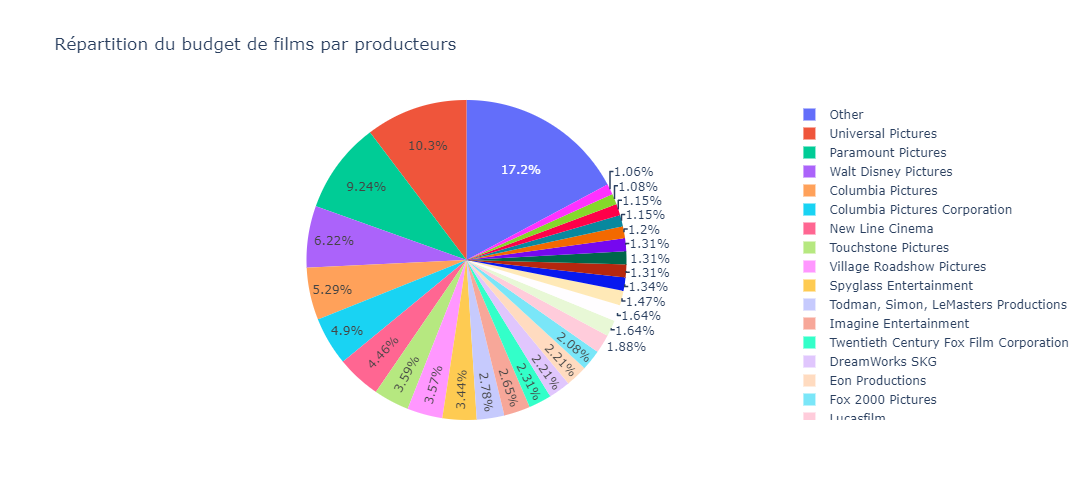

In [318]:
fig2.show()

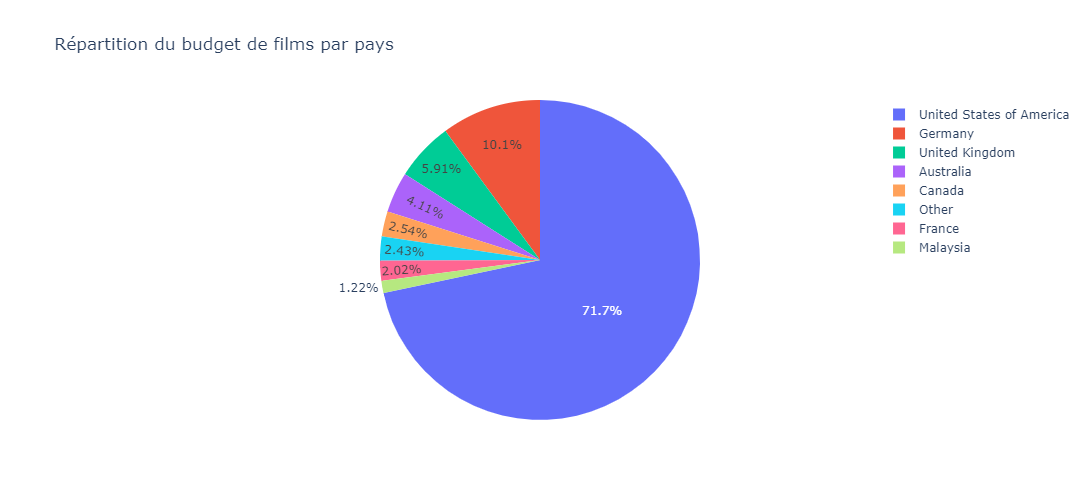

In [319]:
fig3.show()

In [332]:
df_entreprises.reset_index()
df_entreprises

,production_companies,budget,percent_of_total_budget
release_year,,,
1902,Star-Film,5985,1.000000
1903,Edison Manufacturing Company,150,1.000000
1904,Star-Film,7500,1.000000
1905,Hepworth,37,1.000000
1914,Italia Film,210,1.000000
...,...,...,...
2017,Other,25000000,0.005223
2017,Other,1282545,0.000268
2017,Other,707503,0.000148
